In [31]:
import pandas as pd 
import matplotlib.pyplot as plt

In [32]:
import sys
import os

# Add the directory containing the module to the system path
module_path = os.path.abspath(os.path.join('C:\\Users\\samue\\OneDrive\\AIML\\HS2024\\Data Sicence Projekt\\HSLU_DSPRO1_TrafficStatus\\data'))
if module_path not in sys.path:
    sys.path.append(module_path)

# Import the module
import data_engineering_library as dlib

In [33]:
path_from = r"C:\Users\samue\OneDrive\AIML\HS2024\Data Sicence Projekt\Data\London\London_UTD19.csv"
path_detectors = r"C:\Users\samue\OneDrive\AIML\HS2024\Data Sicence Projekt\Data\London\London_detectors.csv"

print("Loading data from: ", path_from)
dataframe_London_UTD19 = pd.DataFrame(dlib.load_data(path=path_from, nrows=None))
print("Loading data from: ", path_detectors)
dataframe_detectors = pd.DataFrame(dlib.load_data(path=path_detectors))
print("Data loaded")

Loading data from:  C:\Users\samue\OneDrive\AIML\HS2024\Data Sicence Projekt\Data\London\London_UTD19.csv
Loading data from:  C:\Users\samue\OneDrive\AIML\HS2024\Data Sicence Projekt\Data\London\London_detectors.csv
Data loaded


In [34]:
dataframe_London_UTD19, errors = dlib.preprocess_dataframe(dataframe_London_UTD19)
print(f"Errors found and dropped: {errors}")

Errors found and dropped: 12234005


In [35]:
dataframe_London_UTD19 = dlib.drop_false_values_by_date(dataframe_London_UTD19, column='flow')

Total outliers detected and removed: 9504


In [36]:
dataframe_London_UTD19 = dlib.clip_outliers(dataframe_London_UTD19, column='occ', group_by_detid=True, outlier_factor=3)

Total outliers clipped: 81


In [37]:
dataframe_London_UTD19 = dlib.clip_outliers(dataframe_London_UTD19, column='flow', group_by_detid=True, outlier_factor=3)

Total outliers clipped: 57


In [38]:
dataframe_London_UTD19 = dlib.calculate_traffic_speed(dataframe_London_UTD19)

In [39]:
dataframe_London_UTD19 = dlib.drop_outliers(dataframe_London_UTD19, column='traffic', group_by_detid=True, outlier_factor=2)

Total outliers dropped: 661222


In [40]:
dataframe_London_UTD19 = dlib.drop_false_values_by_date(dataframe_London_UTD19, column='traffic')

Total outliers detected and removed: 0


In [41]:
dataframe_anomalies = dlib.detect_anomalies(dataframe_London_UTD19, column='traffic', factor=3, min_IQR=5, min_data_points=4000)

Anomalies detected based on IQR: 69
Anomalies detected based on IQR too small: 139
Anomalies detected based on not enough data: 1783


In [42]:
dataframe_London_UTD19, dataframe_anomalies = dlib.handle_anomalies(dataframe_London_UTD19, dataframe_anomalies)

Anomalies with not enough data handled: 686
Total amount of dropeed anomalies: 1163


In [43]:
min_traffic = dataframe_London_UTD19['traffic'].min()
mean_traffic = dataframe_London_UTD19['traffic'].mean()
mode_traffic = dataframe_London_UTD19['traffic'].round().mode()
max_traffic = dataframe_London_UTD19['traffic'].max()
print(f"Minimum traffic: {min_traffic}")
print(f"Mean traffic: {mean_traffic}")
print(f"Mode traffic: {mode_traffic}")
print(f"Maximum traffic: {max_traffic}")

Minimum traffic: 0.0
Mean traffic: 65.35364351777434
Mode traffic: 0    0.0
Name: traffic, dtype: float64
Maximum traffic: 1578.3593417931552


In [44]:
dataframe_London_UTD19 = dlib.combine_datapoints(dataframe_London_UTD19, ratio=3600)

In [45]:
min_traffic = dataframe_London_UTD19['traffic'].min()
mean_traffic = dataframe_London_UTD19['traffic'].mean()
mode_traffic = dataframe_London_UTD19['traffic'].round().mode()
max_traffic = dataframe_London_UTD19['traffic'].max()
print(f"Minimum traffic: {min_traffic}")
print(f"Mean traffic: {mean_traffic}")
print(f"Mode traffic: {mode_traffic}")
print(f"Maximum traffic: {max_traffic}")

Minimum traffic: 0.0
Mean traffic: 64.8561840526476
Mode traffic: 0    1.0
Name: traffic, dtype: float64
Maximum traffic: 1265.63451279


In [46]:
zero_values = dataframe_London_UTD19[dataframe_London_UTD19['traffic'] <= 1]
zero_values.count()

interval    80453
day         80453
detid       80453
weekday     80453
flow        80453
occ         80453
traffic     80453
dtype: int64

In [62]:
dataframe_London_UTD19['traffic'].count()

1710263

In [67]:
high_values = dataframe_London_UTD19[dataframe_London_UTD19['traffic'] >= 170]
unique_detid_count = len(high_values['detid'].unique())
print(f"Count of unique detids: {unique_detid_count}")
num_high_values = high_values['traffic'].count()
print(f'Count of all datapoints: {num_high_values}')

Count of unique detids: 1668
Count of all datapoints: 169042


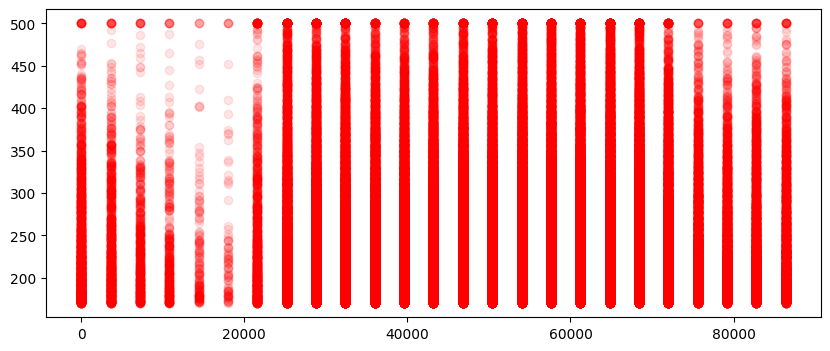

In [68]:
plt.figure(figsize=(10, 4))
plt.scatter(high_values['interval'], high_values['traffic'], alpha=0.1, color='red')
plt.show()

In [49]:
dataframe_London_UTD19 = dlib.clip_to_high_values(dataframe_London_UTD19, column='traffic', threshold=500)

In [70]:
high_detectors = dataframe_London_UTD19[dataframe_London_UTD19['detid'].isin(high_values['detid'].unique())]
high_detectors = high_detectors.merge(dataframe_detectors, on=['detid'], how='inner')
high_detectors.head()

,interval,day,detid,weekday,traffic,long_x,lat_x,pos_x,length_x,length_y,pos_y,fclass,road,limit,citycode,lanes,linkid,long_y,lat_y
0,0.0,2015-05-15,CNTR_N00/005g1,Friday,96,-0.111488,51.511081,0.224619,0.237532,0.237532,0.224619,tertiary,Temple Place,NaN,london,1.0,463.0,-0.111488,51.511081
1,0.0,2015-05-16,CNTR_N00/005g1,Saturday,98,-0.111488,51.511081,0.224619,0.237532,0.237532,0.224619,tertiary,Temple Place,NaN,london,1.0,463.0,-0.111488,51.511081
2,0.0,2015-05-17,CNTR_N00/005g1,Sunday,77,-0.111488,51.511081,0.224619,0.237532,0.237532,0.224619,tertiary,Temple Place,NaN,london,1.0,463.0,-0.111488,51.511081
3,0.0,2015-05-18,CNTR_N00/005g1,Monday,36,-0.111488,51.511081,0.224619,0.237532,0.237532,0.224619,tertiary,Temple Place,NaN,london,1.0,463.0,-0.111488,51.511081
4,0.0,2015-05-19,CNTR_N00/005g1,Tuesday,56,-0.111488,51.511081,0.224619,0.237532,0.237532,0.224619,tertiary,Temple Place,NaN,london,1.0,463.0,-0.111488,51.511081


In [73]:
fclass_counts = high_detectors['fclass'].value_counts()
print(fclass_counts)

fclass
tertiary       416511
primary        195142
residential    110929
other           52347
secondary       25290
Name: count, dtype: int64


In [74]:
dataframe_London_UTD19 =dataframe_London_UTD19.merge(dataframe_detectors, on=['detid'], how='inner')

In [75]:
unique_fclasses = dataframe_London_UTD19['fclass'].unique()

for fclass in unique_fclasses:
    fclass_df = dataframe_London_UTD19[dataframe_London_UTD19['fclass'] == fclass]
    
    min_traffic = fclass_df['traffic'].min()
    mean_traffic = fclass_df['traffic'].mean()
    mode_traffic = fclass_df['traffic'].round().mode()
    max_traffic = fclass_df['traffic'].max()
    
    print(f"fclass: {fclass}")
    print(f"  Minimum traffic: {min_traffic}")
    print(f"  Mean traffic: {mean_traffic}")
    print(f"  Mode traffic: {mode_traffic.tolist()}")
    print(f"  Maximum traffic: {max_traffic}")
    print()  # For better readability

fclass: tertiary
  Minimum traffic: 0
  Mean traffic: 63.983234620055164
  Mode traffic: [1]
  Maximum traffic: 500

fclass: other
  Minimum traffic: 0
  Mean traffic: 61.05341624151418
  Mode traffic: [1]
  Maximum traffic: 500

fclass: residential
  Minimum traffic: 0
  Mean traffic: 62.79492351793021
  Mode traffic: [1]
  Maximum traffic: 500

fclass: primary
  Minimum traffic: 0
  Mean traffic: 70.38789603063991
  Mode traffic: [1]
  Maximum traffic: 500

fclass: secondary
  Minimum traffic: 0
  Mean traffic: 59.45247342140383
  Mode traffic: [1]
  Maximum traffic: 500



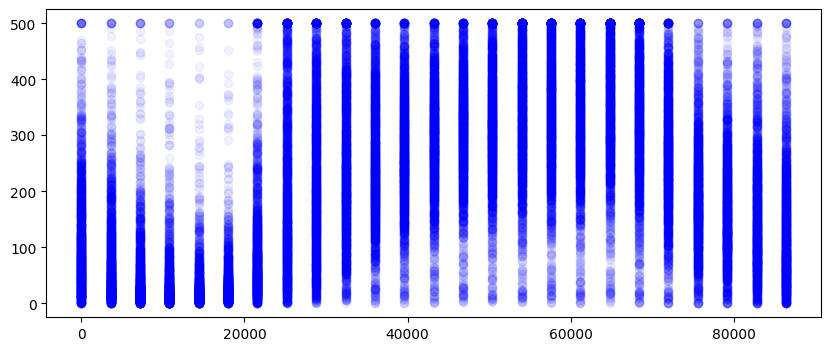

In [51]:
plt.figure(figsize=(10, 4))
plt.scatter(high_detectors['interval'], high_detectors['traffic'], alpha=0.05, color='blue')
plt.show()

In [52]:
dataframe_London_UTD19_normalized = dataframe_London_UTD19.copy()
dataframe_London_UTD19_normalized = dlib.normalize_traffic(dataframe_London_UTD19_normalized)

traffic range was between:0.0 and 500.0


In [53]:
min_traffic = dataframe_London_UTD19_normalized['traffic'].min()
mean_traffic = dataframe_London_UTD19_normalized['traffic'].mean()
mode_traffic = dataframe_London_UTD19_normalized['traffic'].round().mode()
max_traffic = dataframe_London_UTD19_normalized['traffic'].max()
print(f"Minimum traffic: {min_traffic}")
print(f"Mean traffic: {mean_traffic}")
print(f"Mode traffic: {mode_traffic}")
print(f"Maximum traffic: {max_traffic}")

Minimum traffic: 0.0
Mean traffic: 12.829667795756533
Mode traffic: 0    1.0
Name: traffic, dtype: float64
Maximum traffic: 99.0


In [54]:
dataframe_London_UTD19 = dlib.merge_dataframes_on_detid(dataframe_London_UTD19, dataframe_detectors)

In [55]:
zero_values = dataframe_London_UTD19[dataframe_London_UTD19['traffic'] <= 1]
zero_values.count()

interval    80453
day         80453
detid       80453
weekday     80453
flow        80453
occ         80453
traffic     80453
lanes       80453
long        80453
lat         80453
pos         80453
length      80453
dtype: int64

In [56]:
dataframe_London_UTD19 = dlib.final_process_dataframe(dataframe_London_UTD19)
zero_values = dataframe_London_UTD19[dataframe_London_UTD19['traffic'] == 0]
zero_values.count()

interval    44416
day         44416
detid       44416
weekday     44416
traffic     44416
long        44416
lat         44416
pos         44416
length      44416
dtype: int64

In [57]:
na_counts = dataframe_London_UTD19.isna().sum()
print(na_counts)

interval    0
day         0
detid       0
weekday     0
traffic     0
long        0
lat         0
pos         0
length      0
dtype: int64


In [58]:
pathTo = r"C:\Users\samue\OneDrive\AIML\HS2024\Data Sicence Projekt\Data"


def export_modified_dataset(df, path):
    """
    Export the modified DataFrame to a CSV file.

    Parameters:
    df (pd.DataFrame): The modified DataFrame.
    path (str): The path to save the CSV file.
    """
    df.to_csv(f"{path}\\London_UTD19_modified.csv", index=False)

export_modified_dataset(dataframe_London_UTD19, pathTo)

In [76]:
path_dataset = r"C:\Users\samue\OneDrive\AIML\HS2024\Data Sicence Projekt\Data\London_UTD19_Modified.csv"
dataframe_London_UTD19_Modified = dlib.load_data(path=path_dataset, nrows=None)

In [77]:
min_traffic = dataframe_London_UTD19_Modified['traffic'].min()
mean_traffic = dataframe_London_UTD19_Modified['traffic'].mean()
max_traffic = dataframe_London_UTD19_Modified['traffic'].max()
print(f"Minimum traffic: {min_traffic}")
print(f"Mean traffic: {mean_traffic}")
print(f"Maximum traffic: {max_traffic}")

Minimum traffic: 0
Mean traffic: 29.18425821057931
Maximum traffic: 99


Selected detector: EAST_N17/264x1


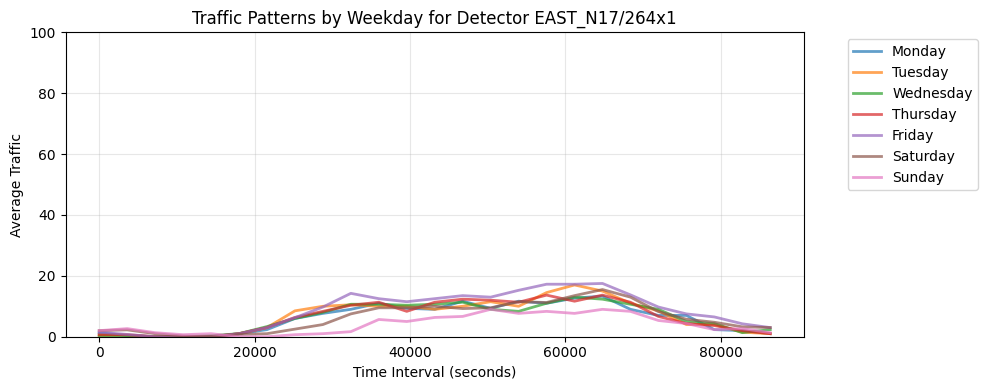

In [265]:
unique_detectors = dataframe_London_UTD19_Modified['detid'].unique()
random_detector = pd.Series(unique_detectors).sample(1).iloc[0]
weekdays = weekdays = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
print(f"Selected detector: {random_detector}")
dataframe_detector = dataframe_London_UTD19_Modified[dataframe_London_UTD19_Modified['detid'] == random_detector]

plt.figure(figsize=(10, 4))

for weekday in weekdays:
    weekday_data = dataframe_detector[dataframe_detector['weekday'] == weekday]
    weekday_mean = weekday_data.groupby('interval')['traffic'].mean()
    plt.plot(weekday_mean.index, weekday_mean.values, label=weekday, linewidth=2, alpha=0.7)

plt.title(f'Traffic Patterns by Weekday for Detector {random_detector}')
plt.xlabel('Time Interval (seconds)')
plt.ylabel('Average Traffic')
plt.ylim(0, 100)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()